<a href="https://colab.research.google.com/github/okbajiya/SMP-Project-2023/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [2]:
data = pd.read_csv('Google_train_data.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [4]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [6]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [7]:
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0])
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [8]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [9]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [10]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 10s - loss: 0.0365 - 10s/epoch - 274ms/step
Epoch 2/20
35/35 - 4s - loss: 0.0112 - 4s/epoch - 118ms/step
Epoch 3/20
35/35 - 4s - loss: 0.0111 - 4s/epoch - 123ms/step
Epoch 4/20
35/35 - 4s - loss: 0.0086 - 4s/epoch - 118ms/step
Epoch 5/20
35/35 - 4s - loss: 0.0079 - 4s/epoch - 122ms/step
Epoch 6/20
35/35 - 4s - loss: 0.0074 - 4s/epoch - 108ms/step
Epoch 7/20
35/35 - 4s - loss: 0.0070 - 4s/epoch - 111ms/step
Epoch 8/20
35/35 - 4s - loss: 0.0092 - 4s/epoch - 129ms/step
Epoch 9/20
35/35 - 4s - loss: 0.0079 - 4s/epoch - 107ms/step
Epoch 10/20
35/35 - 4s - loss: 0.0069 - 4s/epoch - 107ms/step
Epoch 11/20
35/35 - 5s - loss: 0.0055 - 5s/epoch - 134ms/step
Epoch 12/20
35/35 - 4s - loss: 0.0052 - 4s/epoch - 106ms/step
Epoch 13/20
35/35 - 4s - loss: 0.0066 - 4s/epoch - 107ms/step
Epoch 14/20
35/35 - 5s - loss: 0.0059 - 5s/epoch - 134ms/step
Epoch 15/20
35/35 - 4s - loss: 0.0062 - 4s/epoch - 107ms/step
Epoch 16/20
35/35 - 4s - loss: 0.0053 - 4s/epoch - 106ms/step
Epoch 17/20
35/

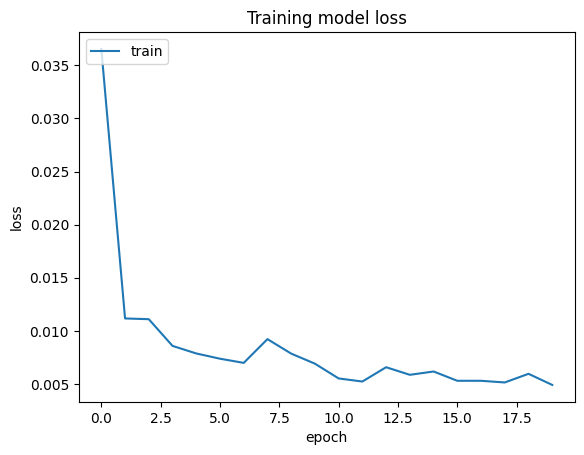

In [11]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [12]:
testData = pd.read_csv('Google_test_data.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values



inputClosing = testData.iloc[:,0:].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [13]:
y_pred = model.predict(X_test)
y_pred

6/6 [==============================] - 1s 38ms/step


array([[1.1892613],
       [1.1913638],
       [1.2008561],
       [1.2154282],
       [1.2276114],
       [1.2285557],
       [1.2181816],
       [1.2028816],
       [1.1922505],
       [1.188588 ],
       [1.1824163],
       [1.17262  ],
       [1.1635456],
       [1.1550407],
       [1.1524953],
       [1.1556479],
       [1.1703655],
       [1.1943289],
       [1.2223345],
       [1.2505616],
       [1.2633609],
       [1.2622575],
       [1.2461243],
       [1.221542 ],
       [1.1983253],
       [1.1840494],
       [1.1795124],
       [1.1783175],
       [1.1721396],
       [1.1628   ],
       [1.1522703],
       [1.1402531],
       [1.1226087],
       [1.100722 ],
       [1.0906992],
       [1.0973481],
       [1.1153451],
       [1.1369185],
       [1.1579875],
       [1.1696682],
       [1.1810206],
       [1.1942809],
       [1.2095146],
       [1.2238793],
       [1.2339653],
       [1.2360337],
       [1.2284459],
       [1.2208622],
       [1.2182312],
       [1.222482 ],


In [14]:
predicted_price = sc.inverse_transform(y_pred)

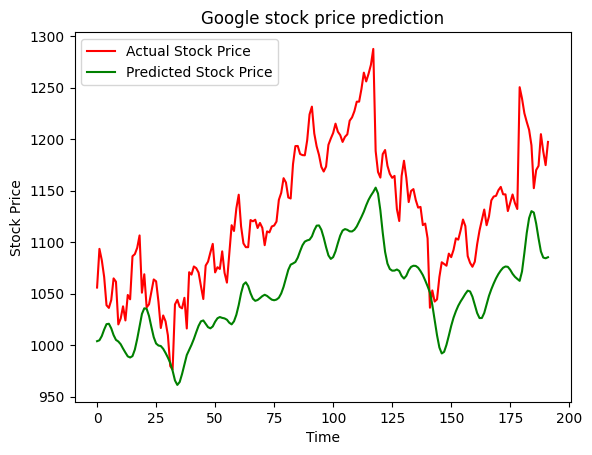

In [15]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()